In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro

sns.set(color_codes = True)

In [2]:
insData = pd.read_csv("insurance.csv")


## Hypothesis Testing##

### 4a: Do charges of people who smoke differ significantly from the people who don't?.###

Test whether the means of two independent samples are significantly different using 2-sample t-test.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

<b>$H_0$:</b>  Mean of charges on smokers is <b>equal to</b> Mean of charges on non-somker. --> $\mu1$ = $\mu2$<br>
<b>$H_A$: </b>  Mean of charges on smokers is <b>not equal</b> to Mean of charges on non-somker --> $\mu1$ <> $\mu2$

<p> Here $\mu1$, $\mu2$ are mean of insurance charges of smokers  and non-smokers respectively <br>

<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. Since it is 2 tailed, singnificance level will be 2.5% on both sides. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we are comparing 2 independent sample variable, hence will go with <b>2-sample t-test</b>

<b>Step-4: Compute the random chance of probability.</b>

In [3]:
#get the data into 2 groups
grp_smokers = insData.query('smoker == "yes"')['charges']
grp_nonsmokers = insData.query('smoker == "no"')['charges']
#print ("Smokers = {}, Non Smokers = {}".format(grp_smokers.mean(), grp_nonsmokers.mean()))

#2-Sample t-test 
t_statistic, p_value = ttest_ind(grp_smokers, grp_nonsmokers)
#t_statistic, p_value = ttest_ind(grp_nonsmokers, grp_smokers)
print("t_statistic = {:.2f}; p_value = {:.4f}".format(t_statistic, p_value))

t_statistic = 46.66; p_value = 0.0000


<b>Step-4 : Make Decision</b>
<br> The probability (p_value = 0.0000) is less than 0.025 significance level, so we will <b>Reject the Null hypothesis.</b> 

#### Which implies that the insurance charges vary significantly for smokers and non-smokers ####



### 4b: Does bmi of males differ significantly from that of female.###


<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

$H_0$: Mean of bmi of males is equal to Mean of bmi of females. --> $\mu1$ = $\mu2$  <br>
$H_A$: Mean of bmi of males is not equal to Mean of bmi of females --> $\mu1$ <> $\mu2$

<p> Here $\mu1$, $\mu2$ are mean of bmi of male and female respectively <br>

<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. Since it is 2 tailed, singnificance level will be 2.5% on both sides. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we are comparing 2 independent sample variable, hence will go with <b>2-sample t-test</b>

<b>Step-4: Compute the random chance of probability.</b>

In [4]:
#get the data into 2 groups
bmi_male = insData.query('sex == "male"')['bmi']
bmi_female = insData.query('sex == "female"')['bmi']

print("male bmi mean = {:.2f}; female bmi mean = {:.4f}".format(bmi_male.mean(), bmi_female.mean()))

#2-Sample t-test 
t_statistic, p_value = ttest_ind(bmi_female, bmi_male)
print("t_statistic = {:.2f}; p_value = {:.4f}".format(t_statistic, p_value))

male bmi mean = 30.94; female bmi mean = 30.3777
t_statistic = -1.70; p_value = 0.0900


<b>Step-4 : Make Decision</b>
<br> The probability (p_value = 0.0900) is greater than 0.025 significance level hence does not fall in the critcial region, so we will <b>Fail to reject Null hypothesis.</b> 

#### So BMI of male and females does not differ significantly ####


### 4c: Is the proportion of smokers significantly differentin different genders?###

Test whether the proportions of smokers are significantly different for genders.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

$H_0$: Proportion of smokers in male & female are equal<br>
$H_A$: Proportion of smokers in male & female are significantly different


<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>.

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we have 2 categorical variable (sex and smoker) and  Analysis of proprotion of smokers w.r.t sex needs to be done.Hence the test method to be used is <b>two proportions z-test</b>

<p><b>Step-4: Compute the random chance of probability.</b>

In [5]:
fsmokers = insData[insData['sex'] == 'female'].smoker.value_counts()[1]  
msmokers = insData[insData['sex'] == 'male'].smoker.value_counts()[1] 
noOffemales = insData.sex.value_counts()[1] 
noOfmales = insData.sex.value_counts()[0] 

print("fsmokers = {:.2f}; msmokers = {:.4f}".format(fsmokers, msmokers))
print("females = {:.2f}; males = {:.4f}".format(noOffemales, noOfmales))

stat, pval = proportions_ztest([fsmokers, msmokers] , [noOffemales, noOfmales])
print("t_statistic = {:.2f}; p_value = {:.4f}".format(stat, pval))

fsmokers = 115.00; msmokers = 159.0000
females = 662.00; males = 676.0000
t_statistic = -2.79; p_value = 0.0053


<b>Step-5 : Make Decision</b>
<br> The p_value (0.0053) is less than 0.05 significance level hence it falls in the critcial region, so we will <b>Reject Null hypothesis.</b> 

#### So there is enough evidence to state that proportion of smokers significantly varies in male & females ####


### 4d: Is the distribution of bmi across women with no children, one child and two children, the same ?###

In [6]:
insData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#Get the bmi values of females with 0, 1, 2 children in different arrays.
bmi_zerochild = insData.query('sex == "female" & children == 0')['bmi']
bmi_onechild = insData.query('sex == "female" & children == 1')['bmi']
bmi_twochild = insData.query('sex == "female" & children == 2')['bmi']

print ("Zero child count = {} mean bmi = {:.2f}".format(len(bmi_zerochild), bmi_zerochild.mean()))
print ("One child count = {} mean bmi = {:.2f}".format(len(bmi_onechild), bmi_onechild.mean()))
print ("Two child count = {} mean bmi = {:.2f}".format(len(bmi_twochild), bmi_twochild.mean()))

#create a dataframe to hold all 3 above created arrays
mean_bmi_df = pd.DataFrame()

#format the data in required format for testing
df0 = pd.DataFrame({'Children': '0', 'BMI':bmi_zerochild})
df1 = pd.DataFrame({'Children': '1', 'BMI':bmi_onechild})
df2 = pd.DataFrame({'Children': '2', 'BMI':bmi_twochild})

mean_bmi_df = mean_bmi_df.append(df0).append(df1).append(df2) 
#mean_bmi_df

Zero child count = 289 mean bmi = 30.36
One child count = 158 mean bmi = 30.05
Two child count = 119 mean bmi = 30.65


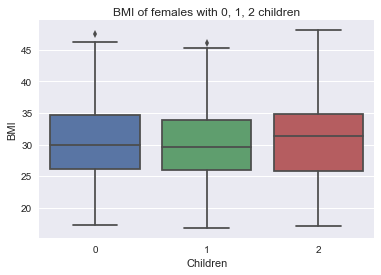

In [8]:
sns.boxplot(x = "Children", y = "BMI", data = mean_bmi_df)
plt.title('BMI of females with 0, 1, 2 children')
plt.show()

Test whether distribution of bmi across women with no children, one child and two children, the vary using One Way Anova test.

<b>Step-1: Set up Hypothesis (NULL and Alternate)</b>

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

Here $\mu1$, $\mu2$ and $\mu3$ are the mean bmi of females with 0,1, 2 children.<br><br>
<b>Step-2: Set the Criteria for  decision.</b>
<p>Test the hyposthesis at <b>5% level of significance</b>. 

<p><b>Step-3: Identify the test statistic.</b>
<p>Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means. The test method is <b>One Way Anova test</b>

<b>Step-4: Compute the random chance of probability using ANOVA table.</b>

In [9]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ Children', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

/Users/preneeth/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                sum_sq     df         F    PR(>F)
Children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


<b>Step-5 : Make Decision</b>

In this example, p value is 0.715858 and it is greater than our chosen level of signifance at 5%

So the statistical decision is to <b>fail to reject null hypothesis</b> at 5% level of significance.

#### So we fail to reject that females  with 0, 1, 2 children have same bmi ####